In [121]:
import numpy as np
import pandas as pd
 
class PastSampler:
    '''
    Forms training samples for predicting future values from past value
    '''
     
    def __init__(self, N, K, sliding_window = True):
        '''
        Predict K future sample using N previous samples
        '''
        self.K = K
        self.N = N
        self.sliding_window = sliding_window
 
    def transform(self, A):
        M = self.N + self.K     #Number of samples per row (sample + target)
        #indexes
        if self.sliding_window:
            I = np.arange(M) + np.arange(A.shape[0] - M + 1).reshape(-1, 1)
        else:
            if A.shape[0]%M == 0:
                I = np.arange(M)+np.arange(0,A.shape[0],M).reshape(-1,1)
                
            else:
                I = np.arange(M)+np.arange(0,A.shape[0] -M,M).reshape(-1,1)
                print('I----',I)
            
        B = A[I].reshape(-1, M * A.shape[1], A.shape[2])
        ci = self.N * A.shape[1]    #Number of features per sample
        return B[:, :ci], B[:, ci:] #Sample matrix, Target matrix


In [122]:
#data file path
dfp = '../data/kaggle/BTC-2021min.csv'

#Columns of price data to use
columns = ['close']
# df = pd.read_csv(dfp).dropna().tail(1000000)
df = pd.read_csv(dfp)
df1 = pd.read_csv(dfp)
time_stamps = df['unix']
df = df.loc[:,columns]
# original_df = pd.read_csv(dfp).dropna().tail(1000000).loc[:,columns]
original_df = pd.read_csv(dfp).loc[:,columns]


In [123]:
#26753010
#df1["date"] = df1["date"].apply(pd.to_datetime)

df1.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
610777,1646105880,3/1/2022 3:38,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
610778,1646105940,3/1/2022 3:39,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270
610779,1646106000,3/1/2022 3:40,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
610780,1646106060,3/1/2022 3:41,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
610781,1646106180,3/1/2022 3:43,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000


In [124]:
df1.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [125]:
file_name='bitcoin2015to2017_close.h5'
time_stamps

0         1609459260
1         1609459320
2         1609459380
3         1609459440
4         1609459500
             ...    
610777    1646105880
610778    1646105940
610779    1646106000
610780    1646106060
610781    1646106180
Name: unix, Length: 610782, dtype: int64

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# normalization
for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))
    
df

,close
0,0.024689
1,0.023526
2,0.023825
3,0.023754
4,0.022637
...,...
610777,0.365931
610778,0.364708
610779,0.365114
610780,0.365860


In [127]:
##%%Features are channels
A = np.array(df)[:,None,:]
original_A = np.array(original_df)[:,None,:]
time_stamps = np.array(time_stamps)[:,None,None]
##%%Make samples of temporal sequences of pricing data (channel)
NPS, NFS = 256, 16         #Number of past and future samples
ps = PastSampler(NPS, NFS, sliding_window=False)


In [128]:
B, Y = ps.transform(A)
B.shape

I---- [[     0      1      2 ...    269    270    271]
 [   272    273    274 ...    541    542    543]
 [   544    545    546 ...    813    814    815]
 ...
 [609824 609825 609826 ... 610093 610094 610095]
 [610096 610097 610098 ... 610365 610366 610367]
 [610368 610369 610370 ... 610637 610638 610639]]


(2245, 256, 1)

In [129]:
print('original_A:',original_A.shape)
print('time_stamps:',time_stamps.shape)
print('B:',B.shape)
print('Y:',Y.shape)


original_A: (610782, 1, 1)
time_stamps: (610782, 1, 1)
B: (2245, 256, 1)
Y: (2245, 16, 1)


In [130]:
input_times, output_times = ps.transform(time_stamps)
original_B, original_Y = ps.transform(original_A)

I---- [[     0      1      2 ...    269    270    271]
 [   272    273    274 ...    541    542    543]
 [   544    545    546 ...    813    814    815]
 ...
 [609824 609825 609826 ... 610093 610094 610095]
 [610096 610097 610098 ... 610365 610366 610367]
 [610368 610369 610370 ... 610637 610638 610639]]
I---- [[     0      1      2 ...    269    270    271]
 [   272    273    274 ...    541    542    543]
 [   544    545    546 ...    813    814    815]
 ...
 [609824 609825 609826 ... 610093 610094 610095]
 [610096 610097 610098 ... 610365 610366 610367]
 [610368 610369 610370 ... 610637 610638 610639]]


In [131]:
print('input_times:',input_times.shape)
print('output_times:',output_times.shape)
print('original_B:',original_B.shape)
print('original_Y:',original_Y.shape)

input_times: (2245, 256, 1)
output_times: (2245, 16, 1)
original_B: (2245, 256, 1)
original_Y: (2245, 16, 1)


In [132]:
data = pd.DataFrame()

In [133]:
np.array(original_df).shape

(610782, 1)

In [134]:
original_B.shape

(2245, 256, 1)

In [135]:
"""
import h5py
with h5py.File(file_name, 'w') as f:
    f.create_dataset("inputs", data = B)
    f.create_dataset('outputs', data = Y)
    f.create_dataset("input_times", data = input_times)
    f.create_dataset('output_times', data = output_times)
    f.create_dataset("original_datas", data=np.array(original_df))
    f.create_dataset('original_inputs',data=original_B)
    f.create_dataset('original_outputs',data=original_Y)
#     f.create_dataset('original_times', data=time_stamps)
"""

'\nimport h5py\nwith h5py.File(file_name, \'w\') as f:\n    f.create_dataset("inputs", data = B)\n    f.create_dataset(\'outputs\', data = Y)\n    f.create_dataset("input_times", data = input_times)\n    f.create_dataset(\'output_times\', data = output_times)\n    f.create_dataset("original_datas", data=np.array(original_df))\n    f.create_dataset(\'original_inputs\',data=original_B)\n    f.create_dataset(\'original_outputs\',data=original_Y)\n#     f.create_dataset(\'original_times\', data=time_stamps)\n'

In [136]:
datas = B
labels = Y
input_times = input_times
output_times = output_times
original_inputs = original_B
original_outputs = original_Y
original_datas = np.array(original_df)

In [137]:
import pandas as pd
import numpy as numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Reshape,LSTM, LeakyReLU
from tensorflow.keras.layers import Conv1D, MaxPooling1D
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os

from tensorflow.compat.v1.keras.backend import set_session
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt


In [138]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.compat.v1.Session(config=config))

In [177]:
step_size = datas.shape[1]
print('step_size',step_size)
units= 50
second_units = 30
batch_size = 8
#batch_size = 1
nb_features = datas.shape[2]
epochs = 150
output_size=16
output_file_name='bitcoin2015to2017_close_LSTM_1_tanh_leaky_'
#split training validation
scaler=MinMaxScaler()
#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,0]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]



step_size 256


In [178]:
ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)

In [179]:
print('ground_true:',ground_true.shape)
print('ground_true_times:',ground_true_times.shape)

ground_true: (449, 272, 1)
ground_true_times: (449, 272, 1)


In [142]:
print('ground_true.shape',ground_true.shape)

print('training_size:',training_size)
print('training_datas:',training_datas.shape)
print('training_labels:',training_labels.shape)
print('validation_datas:',validation_datas.shape)
print('validation_labels:',validation_labels.shape)
print('validation_original_outputs:',validation_original_outputs.shape)
print('validation_original_outputs:',validation_original_inputs.shape)
print('validation_input_times:',validation_input_times.shape)
print('validation_output_times:',validation_output_times.shape)

ground_true.shape (449, 272, 1)
training_size: 1796
training_datas: (1796, 256, 1)
training_labels: (1796, 16)
validation_datas: (449, 256, 1)
validation_labels: (449, 16)
validation_original_outputs: (449, 16, 1)
validation_original_outputs: (449, 256, 1)
validation_input_times: (449, 256, 1)
validation_output_times: (449, 16, 1)


In [143]:
#build model
model = Sequential()
model.add(LSTM(units=units,activation='tanh', input_shape=(step_size,nb_features),return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(output_size))
model.add(LeakyReLU())
model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels, batch_size=batch_size,validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('../weights/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])




Epoch 1/150
225/225 [==============================] - ETA: 0s - loss: 0.0811
Epoch 00001: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-01-0.00339.hdf5
225/225 [==============================] - 17s 77ms/step - loss: 0.0811 - val_loss: 0.0034
Epoch 2/150
225/225 [==============================] - ETA: 0s - loss: 0.0241
Epoch 00002: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-02-0.00153.hdf5
225/225 [==============================] - 17s 76ms/step - loss: 0.0241 - val_loss: 0.0015
Epoch 3/150
225/225 [==============================] - ETA: 0s - loss: 0.0151
Epoch 00003: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-03-0.00021.hdf5
225/225 [==============================] - 16s 71ms/step - loss: 0.0151 - val_loss: 2.1016e-04
Epoch 4/150
225/225 [==============================] - ETA: 0s - loss: 0.0103
Epoch 00004: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-04-0.00011.hdf5
225/225 [======

225/225 [==============================] - ETA: 0s - loss: 0.0046
Epoch 00031: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-31-0.00020.hdf5
225/225 [==============================] - 16s 71ms/step - loss: 0.0046 - val_loss: 2.0029e-04
Epoch 32/150
225/225 [==============================] - ETA: 0s - loss: 0.0052
Epoch 00032: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-32-0.00029.hdf5
225/225 [==============================] - 17s 74ms/step - loss: 0.0052 - val_loss: 2.8736e-04
Epoch 33/150
225/225 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00033: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-33-0.00018.hdf5
225/225 [==============================] - 17s 73ms/step - loss: 0.0047 - val_loss: 1.7678e-04
Epoch 34/150
225/225 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00034: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-34-0.00006.hdf5
225/225 [=======

225/225 [==============================] - ETA: 0s - loss: 0.0046
Epoch 00061: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-61-0.00068.hdf5
225/225 [==============================] - 22s 99ms/step - loss: 0.0046 - val_loss: 6.8351e-04
Epoch 62/150
225/225 [==============================] - ETA: 0s - loss: 0.0049
Epoch 00062: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-62-0.00006.hdf5
225/225 [==============================] - 20s 90ms/step - loss: 0.0049 - val_loss: 5.9730e-05
Epoch 63/150
225/225 [==============================] - ETA: 0s - loss: 0.0046
Epoch 00063: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-63-0.00006.hdf5
225/225 [==============================] - 21s 95ms/step - loss: 0.0046 - val_loss: 5.9187e-05
Epoch 64/150
225/225 [==============================] - ETA: 0s - loss: 0.0049
Epoch 00064: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-64-0.00011.hdf5
225/225 [=======

Epoch 91/150
225/225 [==============================] - ETA: 0s - loss: 0.0048- ETA: 0s - loss:
Epoch 00091: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-91-0.00018.hdf5
225/225 [==============================] - 21s 94ms/step - loss: 0.0048 - val_loss: 1.8064e-04
Epoch 92/150
225/225 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00092: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-92-0.00001.hdf5
225/225 [==============================] - 20s 89ms/step - loss: 0.0047 - val_loss: 1.3805e-05
Epoch 93/150
225/225 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00093: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-93-0.00007.hdf5
225/225 [==============================] - 23s 101ms/step - loss: 0.0045 - val_loss: 6.7427e-05
Epoch 94/150
225/225 [==============================] - ETA: 0s - loss: 0.0049
Epoch 00094: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-9

Epoch 121/150
225/225 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00121: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-121-0.00015.hdf5
225/225 [==============================] - 21s 93ms/step - loss: 0.0047 - val_loss: 1.5438e-04
Epoch 122/150
225/225 [==============================] - ETA: 0s - loss: 0.0053
Epoch 00122: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-122-0.00020.hdf5
225/225 [==============================] - 19s 85ms/step - loss: 0.0053 - val_loss: 2.0371e-04
Epoch 123/150
225/225 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00123: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-123-0.00003.hdf5
225/225 [==============================] - 21s 92ms/step - loss: 0.0047 - val_loss: 2.9467e-05
Epoch 124/150
225/225 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00124: saving model to ../weights/bitcoin2015to2017_close_LSTM_1_tanh_leaky_-124-0.00001.

In [158]:
original_datas.shape

(610782, 1)

In [171]:

predicted = model.predict(validation_datas)
predicted_inverted = []

# we only care about the 0 axis, close price data
scaler=MinMaxScaler()

scaler.fit(original_datas[:,0].reshape(-1,1))
predicted_inverted.append(scaler.inverse_transform(predicted))
print(np.array(predicted_inverted).shape)


(1, 449, 16)


In [175]:
ground_true.shape

(122128,)

In [180]:
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print(np.array(predicted_inverted).shape)

(7184,)


In [181]:
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')
validation_output_times

DatetimeIndex(['2021-12-06 10:09:00', '2021-12-06 10:10:00',
               '2021-12-06 10:11:00', '2021-12-06 10:12:00',
               '2021-12-06 10:13:00', '2021-12-06 10:14:00',
               '2021-12-06 10:15:00', '2021-12-06 10:16:00',
               '2021-12-06 10:17:00', '2021-12-06 10:18:00',
               ...
               '2022-03-01 01:11:00', '2022-03-01 01:12:00',
               '2022-03-01 01:13:00', '2022-03-01 01:14:00',
               '2022-03-01 01:15:00', '2022-03-01 01:16:00',
               '2022-03-01 01:17:00', '2022-03-01 01:18:00',
               '2022-03-01 01:19:00', '2022-03-01 01:20:00'],
              dtype='datetime64[ns]', length=7184, freq=None)

In [182]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true
ground_true_df.set_index('times').reset_index()
ground_true_df.shape

(122128, 2)

In [183]:
#predicted_inverted.shape
ground_true_df

,times,value
0,2021-12-06 05:53:00,48910.74
1,2021-12-06 05:54:00,48895.65
2,2021-12-06 05:55:00,48867.13
3,2021-12-06 05:56:00,48845.18
4,2021-12-06 05:57:00,48840.16
...,...,...
122123,2022-03-01 01:16:00,43296.65
122124,2022-03-01 01:17:00,43281.66
122125,2022-03-01 01:18:00,43265.97
122126,2022-03-01 01:19:00,43290.40


In [184]:
prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted
prediction_df.shape

(7184, 2)

In [151]:
prediction_df

,times,value
0,2021-12-06 10:09:00,47655.328125
1,2021-12-06 10:10:00,47656.296875
2,2021-12-06 10:11:00,47657.484375
3,2021-12-06 10:12:00,47656.417969
4,2021-12-06 10:13:00,47654.710938
...,...,...
7179,2022-03-01 01:16:00,44115.226562
7180,2022-03-01 01:17:00,44120.531250
7181,2022-03-01 01:18:00,44120.847656
7182,2022-03-01 01:19:00,44116.160156


In [152]:
prediction_df = prediction_df.loc[(prediction_df["times"].dt.year <= 2021 )&(prediction_df["times"].dt.month <= 5 ),: ]
ground_true_df = ground_true_df.loc[(ground_true_df["times"].dt.year <= 2021 )&(ground_true_df["times"].dt.month <= 5 ),:]

In [153]:
ground_true_df.head(100)


,times,value


In [154]:
prediction_df

,times,value


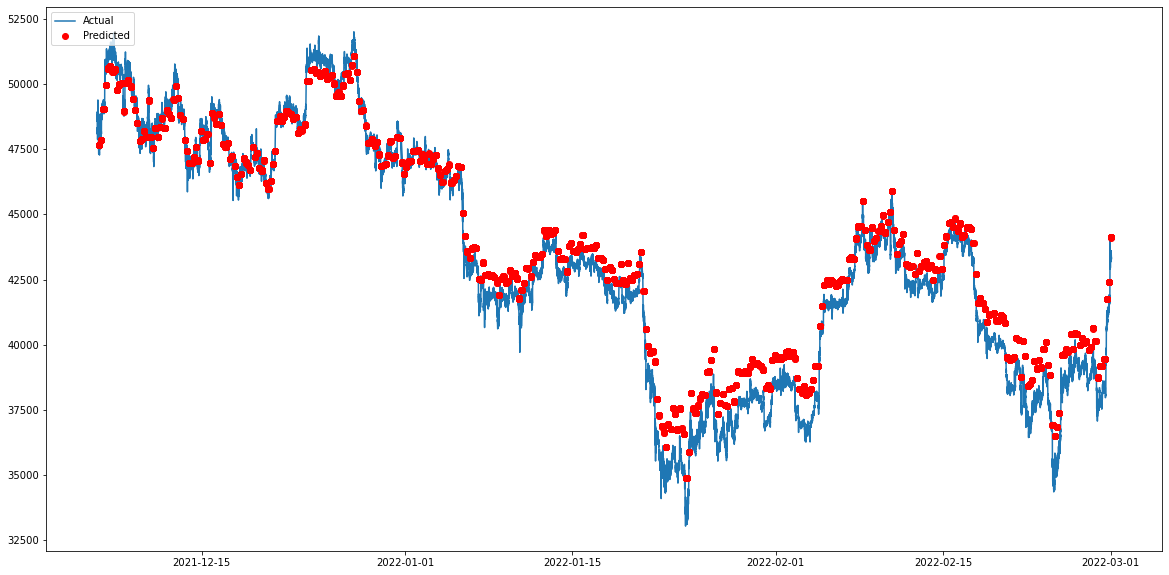

In [185]:
plt.figure(figsize=(20,10))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
# plt.plot(prediction_df.times,prediction_df.value, label = 'Predicted')
plt.plot(prediction_df.times,prediction_df.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.savefig('../output/bitcoin2015to2017_close_LSTM_1_tanh_leaky_result.png')
plt.show()

In [186]:
from sklearn.metrics import mean_squared_error
mean_squared_error(validation_original_outputs[:,:,0].reshape(-1),predicted_inverted)

649243.6767731439

In [157]:
9058673.3771138

output_times[training_size:,:,:]
output_times.shape

(2245, 16, 1)